# 서울시 건설 알림이 정보
데이터 링크 : http://data.seoul.go.kr/dataList/OA-1222/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd /content/drive/MyDrive/일일 데이터 분석

/content/drive/MyDrive/일일 데이터 분석


In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./서울시 건설 알림이 정보.csv', encoding='cp949')

In [ ]:
# 총 5594건의 사업
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5594 entries, 0 to 5593
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   프로젝트 명                5594 non-null   object 
 1   사업착수일(계약일)            5594 non-null   int64  
 2   사업기간                  5594 non-null   object 
 3   프로젝트 종료여부(진행:0 종료:1)  5594 non-null   int64  
 4   사무실주소                 2 non-null      object 
 5   프로젝트 주소               5580 non-null   object 
 6   위치좌표(위도)              5590 non-null   float64
 7   위치좌표(경도)              5590 non-null   float64
 8   자치구 구분                3448 non-null   object 
 9   사업금액(억원)              316 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 437.2+ KB


In [ ]:
# 결측치 확인
data.isnull().sum()

프로젝트 명                     0
사업착수일(계약일)                 0
사업기간                       0
프로젝트 종료여부(진행:0 종료:1)       0
사무실주소                   5592
프로젝트 주소                   14
위치좌표(위도)                   4
위치좌표(경도)                   4
자치구 구분                  2146
사업금액(억원)                5278
dtype: int64

In [ ]:
# 결측치가 아닌 사무실주소 2개 행 출력
data[data['사무실주소'].isnull() == False]

,프로젝트 명,사업착수일(계약일),사업기간,프로젝트 종료여부(진행:0 종료:1),사무실주소,프로젝트 주소,위치좌표(위도),위치좌표(경도),자치구 구분,사업금액(억원)
695,월드컵대교건설공사,201003,2010-03-18~2024-02-29,0,서울특별시 마포구 상암동 ~ 영등포구 양평동,서울특별시 마포구 상암동~영등포구 양평동,37.556345,126.885088,마포구,3911.390000
4893,강남순환도시고속도로8공구 구룡지하차도 전기공사,201208,2012-08-02~2022-12-31,1,서울특별시 서초구 양재동 402-17,서울특별시 서초구 동산로8길 75,37.471570,127.051267,NaN,32.273288


In [ ]:
# 결측치인 위경도 2개 행 출력
data[data['위치좌표(위도)'].isnull()]

,프로젝트 명,사업착수일(계약일),사업기간,프로젝트 종료여부(진행:0 종료:1),사무실주소,프로젝트 주소,위치좌표(위도),위치좌표(경도),자치구 구분,사업금액(억원)
1647,[테스트] 교육용22 건설공사,201703,2017-03-05~2023-12-31,0,NaN,서울특별시 중구 청계천로 8 (무교동),NaN,NaN,NaN,NaN
1648,강남순환도시고속도로 건설(민자구간),200711,2007-11-01~2100-12-31,0,NaN,금천구 시흥동~ 서초구 우면동,NaN,NaN,NaN,NaN
1649,도시철도설비부,201301,2013-01-22~2100-12-31,0,NaN,NaN,NaN,NaN,NaN,NaN
1650,동부간선도로 확장공사(총괄),200001,2000-01-01~2100-12-31,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def preprocessing(dataframe):
  df = dataframe.copy()
  df['사업착수일(계약일)'] = df['사업기간'].map(lambda x : x[:10])
  df['사업완료일'] = df['사업기간'].map(lambda x : x[11:])
  
  df['사업착수일(계약일)'] = pd.to_datetime(df['사업착수일(계약일)'])
  df['사업완료일'] = pd.to_datetime(df['사업완료일'])
  
  df['사업 착수 년도'] = df['사업착수일(계약일)'].map(lambda x: x.year)
  df['사업 착수 월'] = df['사업착수일(계약일)'].map(lambda x: x.month)
  df['사업 착수 일'] = df['사업착수일(계약일)'].map(lambda x: x.day)
  
  df['사업 완료 년도'] = df['사업완료일'].map(lambda x: x.year)
  df['사업 완료 월'] = df['사업완료일'].map(lambda x: x.month)
  df['사업 완료 일'] = df['사업완료일'].map(lambda x: x.day)
  
  df['총 사업일'] = df['사업완료일'] - df['사업착수일(계약일)']
  df['총 사업일'] = df['총 사업일'].map(lambda x: x.days)

  df['위치좌표(위도)'] = df['위치좌표(위도)'].fillna(0)
  df['위치좌표(경도)'] = df['위치좌표(경도)'].fillna(0)
  df['사업금액(억원)'] = df['사업금액(억원)'].fillna(0)

  df['사무실주소'] = df['사무실주소'].fillna('')
  df['프로젝트 주소'] = df['프로젝트 주소'].fillna('')
  df['자치구 구분'] = df['자치구 구분'].fillna('')
  

  return df

In [27]:
df = preprocessing(data)

In [ ]:
df.isnull().sum()

프로젝트 명                  0
사업착수일(계약일)              0
사업기간                    0
프로젝트 종료여부(진행:0 종료:1)    0
사무실주소                   0
프로젝트 주소                 0
위치좌표(위도)                0
위치좌표(경도)                0
자치구 구분                  0
사업금액(억원)                0
사업완료일                   0
사업 착수 년도                0
사업 착수 월                 0
사업 착수 일                 0
사업 완료 년도                0
사업 완료 월                 0
사업 완료 일                 0
총 사업일                   0
dtype: int64

In [ ]:
df.head()

,프로젝트 명,사업착수일(계약일),사업기간,프로젝트 종료여부(진행:0 종료:1),사무실주소,프로젝트 주소,위치좌표(위도),위치좌표(경도),자치구 구분,사업금액(억원),사업완료일,사업 착수 년도,사업 착수 월,사업 착수 일,사업 완료 년도,사업 완료 월,사업 완료 일,총 사업일
0,전통 홍염공방 바닥난방 등 보수공사,2022-12-21,2022-12-21~2023-03-07,0,,서울특별시 중구 세종대로 110,37.566365,126.978539,중구,0.0,2023-03-07,2022,12,21,2023,3,7,76
1,2023년 청사 기계설비 유지보수 공사(연간단가),2022-12-22,2022-12-22~2023-12-31,0,,서울특별시 중구 세종대로 110,37.566617,126.978630,중구,0.0,2023-12-31,2022,12,22,2023,12,31,374
2,2023년 한강교량 일상유지보수공사(2공구),2023-01-01,2023-01-01~2023-12-31,0,,서울특별시 중구 세종대로 110,37.566581,126.978720,중구,0.0,2023-12-31,2023,1,1,2023,12,31,364
3,2023년 교량시설물 일상유지보수공사(강남),2023-01-01,2023-01-01~2023-12-31,0,,서울특별시 중구 세종대로 110,37.566653,126.978720,중구,0.0,2023-12-31,2023,1,1,2023,12,31,364
4,2023년 본관 청사 통신공사(연간단가),2022-12-23,2022-12-23~2023-12-31,0,,서울특별시 중구 세종대로 110,37.566653,126.978720,중구,0.0,2023-12-31,2022,12,23,2023,12,31,373


# 시각화
- 년,월별 사업 현황은?

- 건설 사업이 가장 많았던 지역은?

- 사업금액이 가장 큰 건설 사업은?

- 건설 기간이 가장 길었던 사업은?

In [ ]:
def make_countplot(df,col_name):
  plt.figure(figsize=(15,7))
  sns.countplot(df[col_name])
  plt.show()

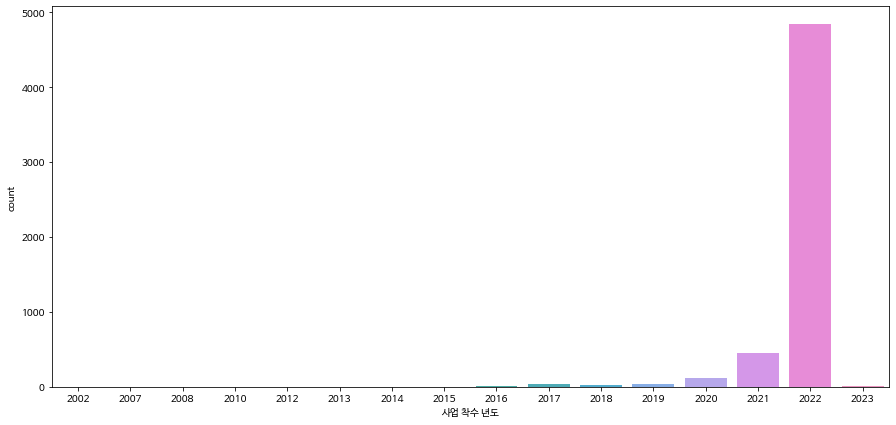

In [ ]:
make_countplot(df,'사업 착수 년도')

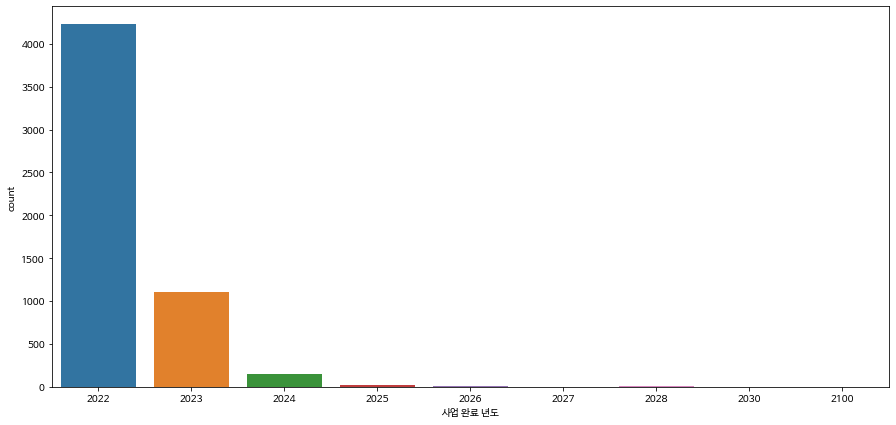

In [ ]:
make_countplot(df,'사업 완료 년도')

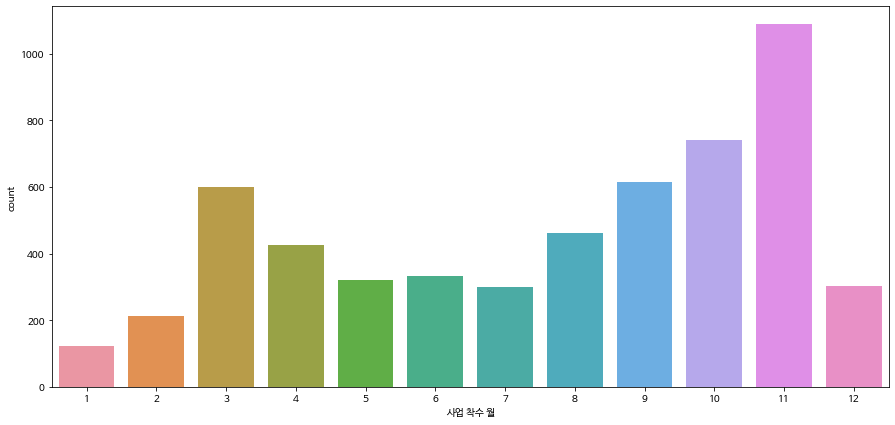

In [ ]:
make_countplot(df,'사업 착수 월')

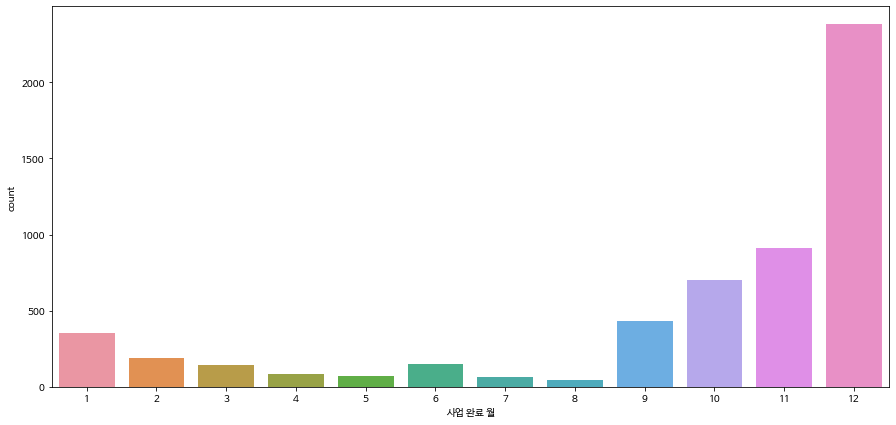

In [ ]:
make_countplot(df,'사업 완료 월')

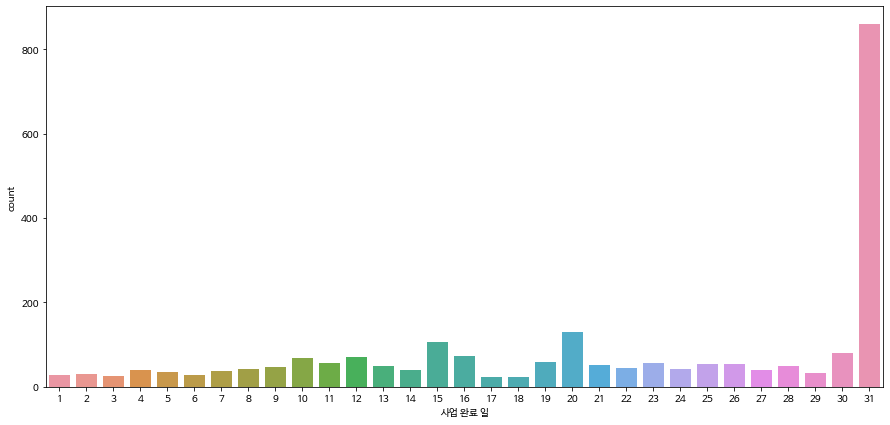

In [ ]:
end_month_df = df[df['사업 완료 월'] == 12]
make_countplot(end_month_df,'사업 완료 일')

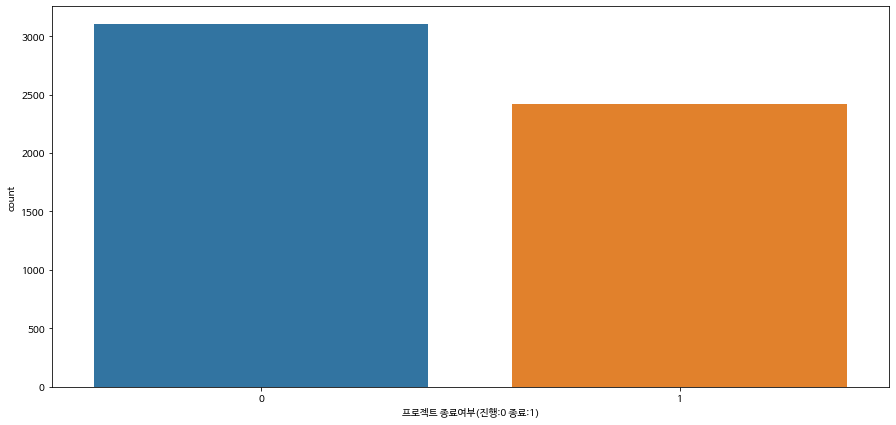

In [ ]:
make_countplot(df,'프로젝트 종료여부(진행:0 종료:1)')

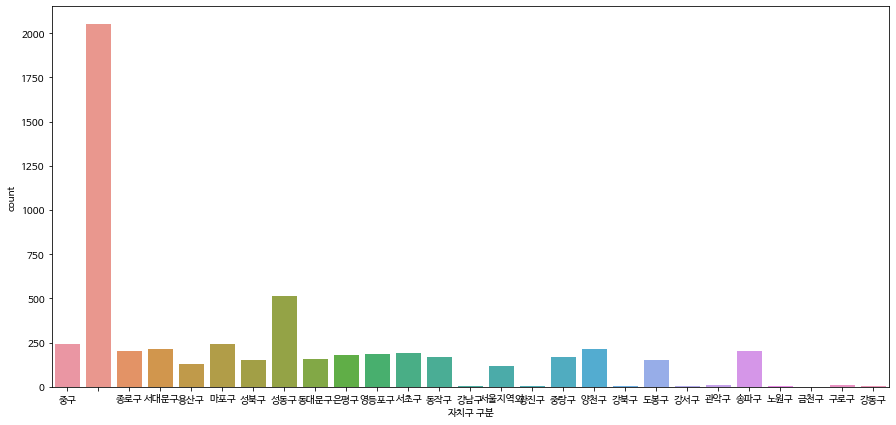

In [ ]:
make_countplot(df,'자치구 구분')

count      5522.00
mean       1190.70
std       87629.71
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     6511780.00
Name: 사업금액(억원), dtype: float64


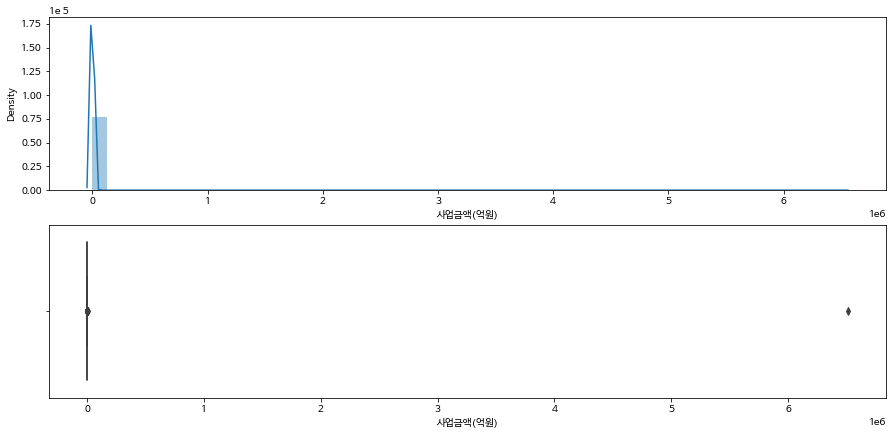

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
print(df['사업금액(억원)'].describe())

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.distplot(df['사업금액(억원)'])

plt.subplot(2,1,2)
sns.boxplot(df['사업금액(억원)'])

plt.show()

count   271.00
mean     75.43
std     150.32
min       0.20
25%       4.30
50%      15.00
75%      82.23
max     984.50
Name: 사업금액(억원), dtype: float64


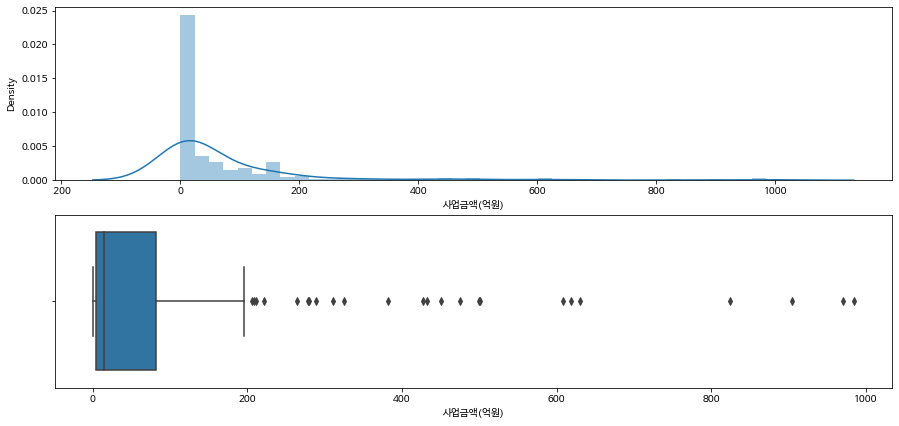

In [ ]:
cost_df = df[(df['사업금액(억원)'] > 0) & (df['사업금액(억원)'] < 1000)]
print(cost_df['사업금액(억원)'].describe())

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.distplot(cost_df['사업금액(억원)'])

plt.subplot(2,1,2)
sns.boxplot(x = '사업금액(억원)', data = cost_df)

plt.show()

count    5522.00
mean      259.59
std       737.78
min         1.00
25%        36.00
50%       136.00
75%       298.00
max     34028.00
Name: 총 사업일, dtype: float64


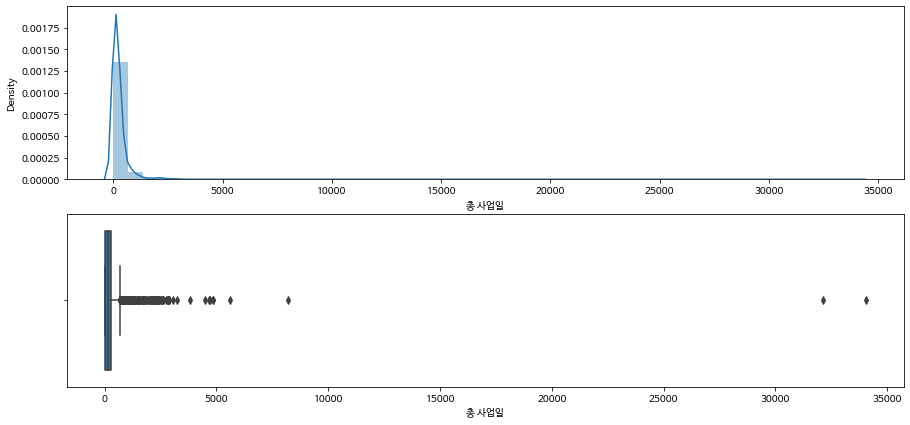

In [ ]:
print(df['총 사업일'].describe())

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
sns.distplot(df['총 사업일'])

plt.subplot(2,1,2)
sns.boxplot(df['총 사업일'])

plt.show()

In [ ]:
# 가장 길고, 짧았던 사업
date_df = df[df['총 사업일'] < 30000]
date_df[date_df['총 사업일'] == date_df['총 사업일'].max()]

,프로젝트 명,사업착수일(계약일),사업기간,프로젝트 종료여부(진행:0 종료:1),사무실주소,프로젝트 주소,위치좌표(위도),위치좌표(경도),자치구 구분,사업금액(억원),사업완료일,사업 착수 년도,사업 착수 월,사업 착수 일,사업 완료 년도,사업 완료 월,사업 완료 일,총 사업일
1298,강남순환도시고속도로 건설(8공구),2002-07-03,2002-07-03~2024-12-31,0,,서울시 서초구 우면동~과천시 주암동~강남구 수서동(수서IC),37.463625,127.03866,서초구,4675.01,2024-12-31,2002,7,3,2024,12,31,8217


In [ ]:
df[df['총 사업일'] == df['총 사업일'].min()]

,프로젝트 명,사업착수일(계약일),사업기간,프로젝트 종료여부(진행:0 종료:1),사무실주소,프로젝트 주소,위치좌표(위도),위치좌표(경도),자치구 구분,사업금액(억원),사업종료일,사업 착수 년도,사업 착수 월,사업 착수 일,사업 종료 년도,사업 종료 월,사업 종료 일,총 사업일
3628,응봉테니스장 조명 교체 및 이설 공사,2022-11-08,2022-11-08~2022-11-09,1,,서울특별시 성동구 청계천로 546,37.571727,127.036762,성동구,0.0,2022-11-09,2022,11,8,2022,11,9,1


In [ ]:
# 가장 비싼 사업과 싼 사업
cost_df = df[df['사업금액(억원)'] < 10000]
cost_df[cost_df['사업금액(억원)'] == cost_df['사업금액(억원)'].max()]

,프로젝트 명,사업착수일(계약일),사업기간,프로젝트 종료여부(진행:0 종료:1),사무실주소,프로젝트 주소,위치좌표(위도),위치좌표(경도),자치구 구분,사업금액(억원),사업완료일,사업 착수 년도,사업 착수 월,사업 착수 일,사업 완료 년도,사업 완료 월,사업 완료 일,총 사업일
1298,강남순환도시고속도로 건설(8공구),2002-07-03,2002-07-03~2024-12-31,0,,서울시 서초구 우면동~과천시 주암동~강남구 수서동(수서IC),37.463625,127.03866,서초구,4675.01,2024-12-31,2002,7,3,2024,12,31,8217


In [ ]:
cost_min_df = df[df['사업금액(억원)'] > 0]
cost_min_df[cost_min_df['사업금액(억원)'] == cost_min_df['사업금액(억원)'].min()]

,프로젝트 명,사업착수일(계약일),사업기간,프로젝트 종료여부(진행:0 종료:1),사무실주소,프로젝트 주소,위치좌표(위도),위치좌표(경도),자치구 구분,사업금액(억원),사업종료일,사업 착수 년도,사업 착수 월,사업 착수 일,사업 종료 년도,사업 종료 월,사업 종료 일,총 사업일
3231,청사 흡연부스 제작구매 설치공사,2022-11-15,2022-11-15~2022-11-25,1,,서울특별시 서대문구 서소문로 51,37.561911,126.966751,서대문구,0.2,2022-11-25,2022,11,15,2022,11,25,10
3414,용산전자 상상가 전기공사,2022-11-08,2022-11-08~2022-12-08,1,,서울특별시 용산구 청파로 77,37.533849,126.965345,용산구,0.2,2022-12-08,2022,11,8,2022,12,8,30
5049,유휴공간 석면해체제거 공사,2022-10-26,2022-10-26~2022-11-26,1,,과천시 장군마을3길 30,37.464864,127.032396,서울지역외,0.2,2022-11-26,2022,10,26,2022,11,26,31


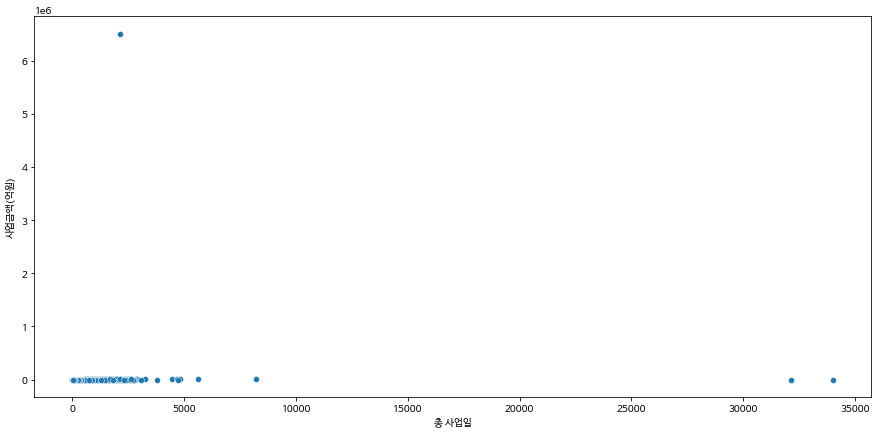

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = df['총 사업일'], y = df['사업금액(억원)'])

In [28]:
# 사업 주소별 지도 시각화(위경도)
import folium as g

# 성동구 기준
geo_df = df[df['자치구 구분'] == '성동구']

# 평균으로 중심 좌표 설정
center_longitude, center_latitude = geo_df['위치좌표(경도)'].mean(), geo_df['위치좌표(위도)'].mean()

# 중심좌표를 기준으로 맵 생성
g_map = g.Map(location=[center_latitude,center_longitude],
              tiles='Stamen Terrain',
              zoom_start=12)

# 마커 생성
for name,lat,lng in zip(geo_df['프로젝트 명'], geo_df['위치좌표(위도)'] , geo_df['위치좌표(경도)']):
  if lat == 0:
    continue

  marker = g.Marker([lat,lng],
                    popup=name,
                    icon= g.Icon(color='red')).add_to(g_map)

In [29]:
g_map

# 시각화 결과
- 년,월별 사업 현황은?
  - 2022년에 착수되어 2022년에 완료되는 사업이 대부분이었다.
  - 사업 착수 일자는 골고루 분포되어 있었지만, 사업 완료 일자는 매 월 마지막 날짜와, 한 해의 마지막인 12월의 비중이 높았다<br><br>

- 건설 사업이 가장 많았던 지역은?
 - 가장 건설 사업이 많았던 지역은 성동구이고, 2위는 중구로 나타났다.<br><br>

- 사업금액이 가장 큰 건설 사업은?
  - 강남순환도시고속도로 건설 사업이 약 4675억으로 가장 금액이 컸으며, 흡연부스 설치가 2천만원으로 가장 금액이 낮았다.
  - 대체로 건설 사업 규모와 사업 금액이 비례한다.<br><br>

- 건설 기간이 가장 길었던 사업은?
  - 기간 역시 강남순환도시 고속도로 건설이 약 20년 가량으로 가장 길었으며, 테니스장 조명 교체 및 이설 공사 등 기간이 하루인 소규모 사업들이 존재했다.<br><br>

- 지도 시각화 결과 프로젝트 주소가 제대로 일치하지 않은 사업들이 존재했다.